<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F_(%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%2C_PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка данных

Загружаем датасет, подготовленный на предыдущих этапах обучения.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json, requests, urllib, io
import pandas
import os

raw_table_data = pd.read_csv("/content/drive/MyDrive/Модуль 7 Машинное обучение/heart3.csv")
raw_table_data.head(5)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,1,-3
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,1,-4


In [5]:
#смотрим размерность датасета
raw_table_data.shape

(949, 35)

# Helicopter view

In [6]:
#смотим данные датасета в табличном виде - первые пять строк
table_data = raw_table_data
table_data.head()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,1,-3
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,1,-4


In [7]:
#статистические параметры распределения по столбцам
table_data.describe()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,0.043203,32.206533,0.523709,0.353003,6.819810,1.070095,0.335090,5.868599,0.485774,2.043393,...,11.140148,0.075869,5.886196,4.124341,28.175869,0.048472,682.750558,125.584941,0.548999,-3.320337
std,0.203422,26.942616,0.499701,0.478156,1.364942,0.368732,0.472271,1.667100,0.500061,1.704405,...,1.165774,0.264929,9.105321,0.730100,4.825009,0.214875,268.745640,60.887692,0.497856,1.507582
min,0.000000,6.000000,0.000000,0.000000,0.000000,-0.680000,0.000000,3.600000,0.000000,0.210000,...,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000,24.012056,5.048727,0.000000,-11.000000
25%,0.000000,18.000000,0.000000,0.000000,6.000000,0.850000,0.000000,4.500000,0.000000,0.860000,...,10.000000,0.000000,0.000000,4.000000,24.200000,0.000000,799.009540,80.073907,0.000000,-4.000000
50%,0.000000,20.000000,1.000000,0.000000,7.000000,1.110000,0.000000,5.200000,0.000000,1.480000,...,11.000000,0.000000,0.000000,4.000000,27.600000,0.000000,799.040754,123.007116,1.000000,-3.000000
75%,0.000000,25.000000,1.000000,1.000000,8.000000,1.340000,1.000000,7.300000,1.000000,2.690000,...,12.000000,0.000000,10.000000,5.000000,32.300000,0.000000,799.068772,136.086466,1.000000,-2.000000
max,1.000000,90.000000,1.000000,1.000000,12.000000,1.790000,1.000000,9.200000,1.000000,14.300000,...,15.000000,1.000000,40.000000,5.000000,37.000000,1.000000,799.099835,224.099724,1.000000,8.000000


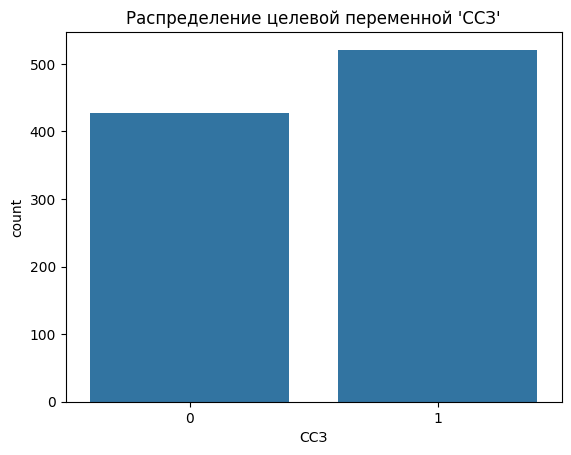

In [8]:
#проверяем распределение целевого признака
sns.countplot(data=table_data, x="ССЗ")
plt.title("Распределение целевой переменной 'ССЗ'")
plt.show()

# Визуализация распределения значений датасета

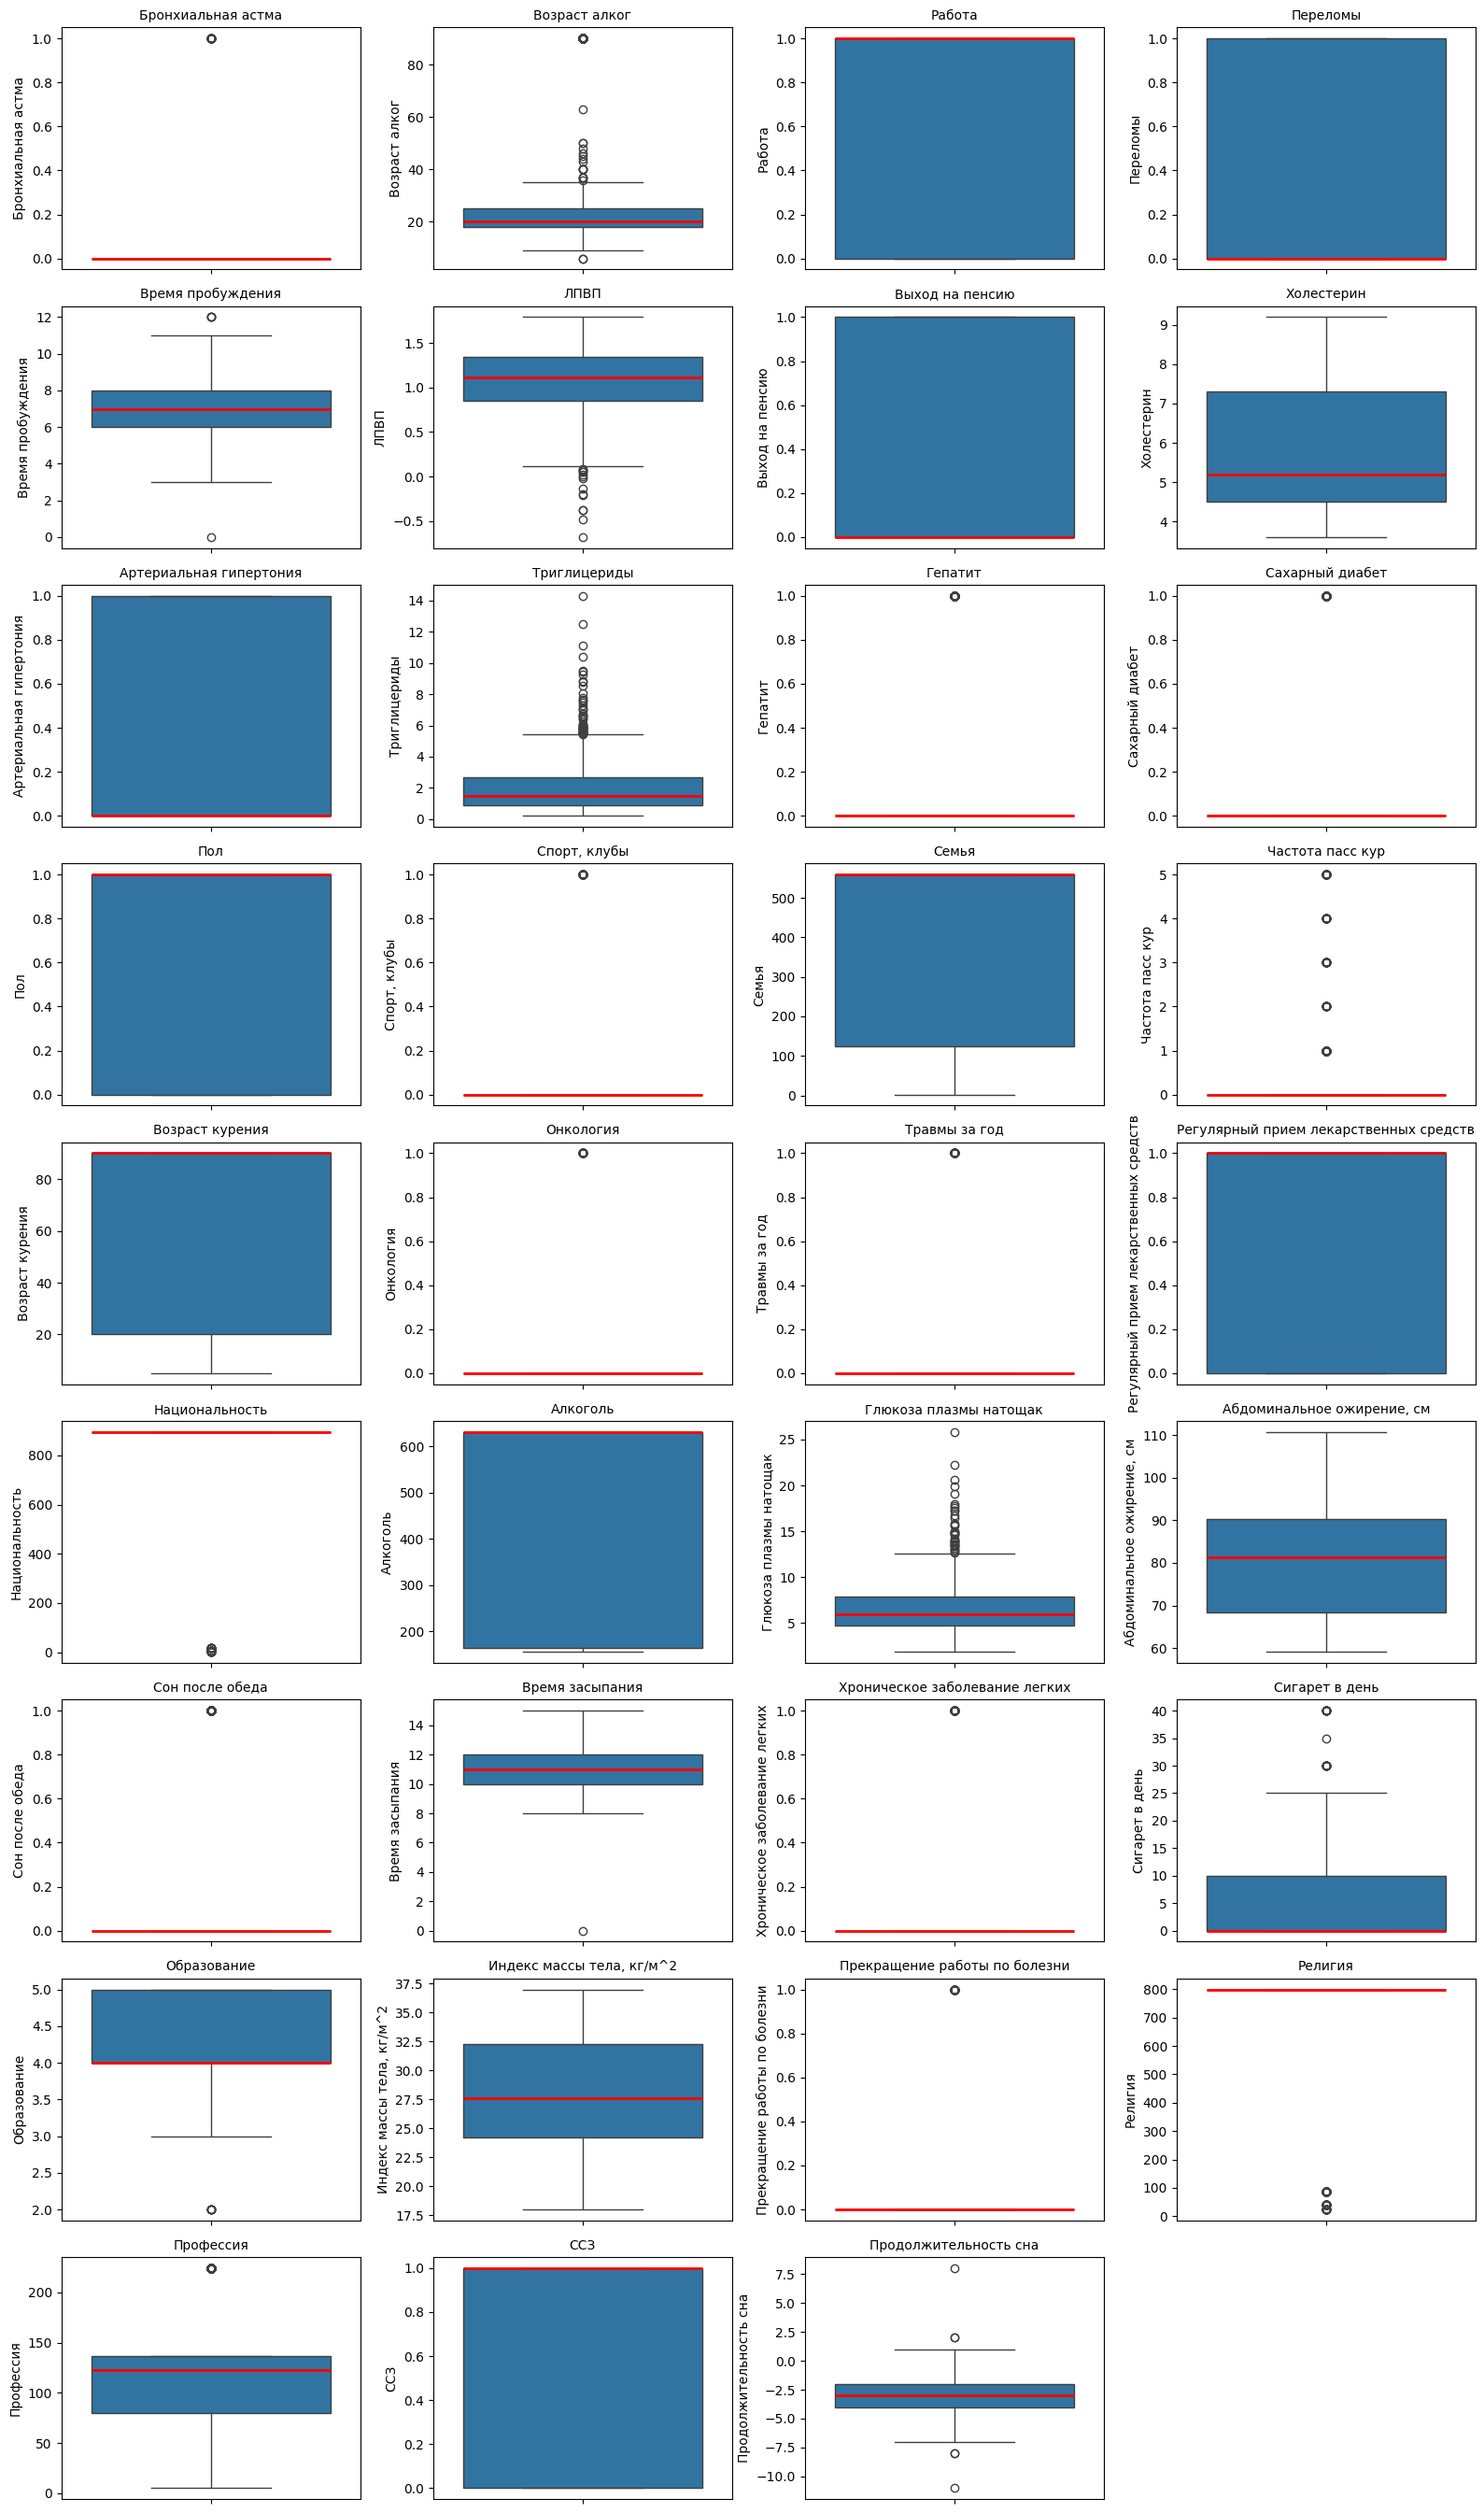

In [9]:
n = table_data.shape[1]  # Количество столбцов
cols_per_row = 4  # Сколько графиков в одной строке
n_rows = (n + cols_per_row - 1) // cols_per_row  # Вычисляем количество строк

fig, axes = plt.subplots(
    n_rows,
    cols_per_row,
    figsize=(cols_per_row * 4, n_rows * 3),  # Размер фигуры (ширина, высота)
    squeeze=False  # Гарантирует, что axes всегда будет двумерным массивом
)

# Убираем лишние оси, если столбцов не кратно cols_per_row
for i in range(n, n_rows * cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Строим боксплоты
for i, col in enumerate(table_data.columns):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    ax = axes[row_idx, col_idx]

    sns.boxplot(
        y=table_data.iloc[:, i],
        data=table_data,
        ax=ax,
        medianprops={"color": "r", "linewidth": 2}
    )
    ax.set_title(col, fontsize=10)  # Подпись графика

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

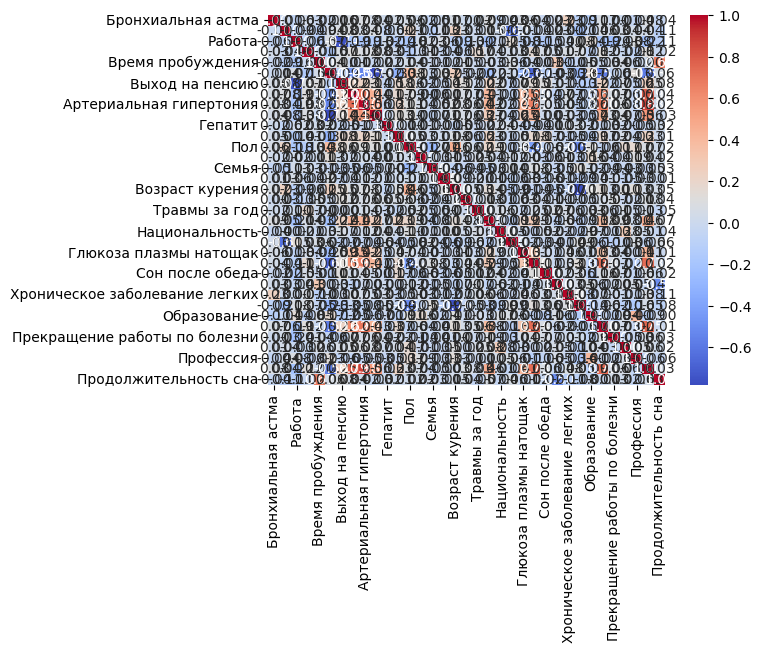

In [10]:
#проверяем корреляцию признаков

sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

Text(0.5, 1.0, 'Тепловая карта корреляции (уровень 1/2)')

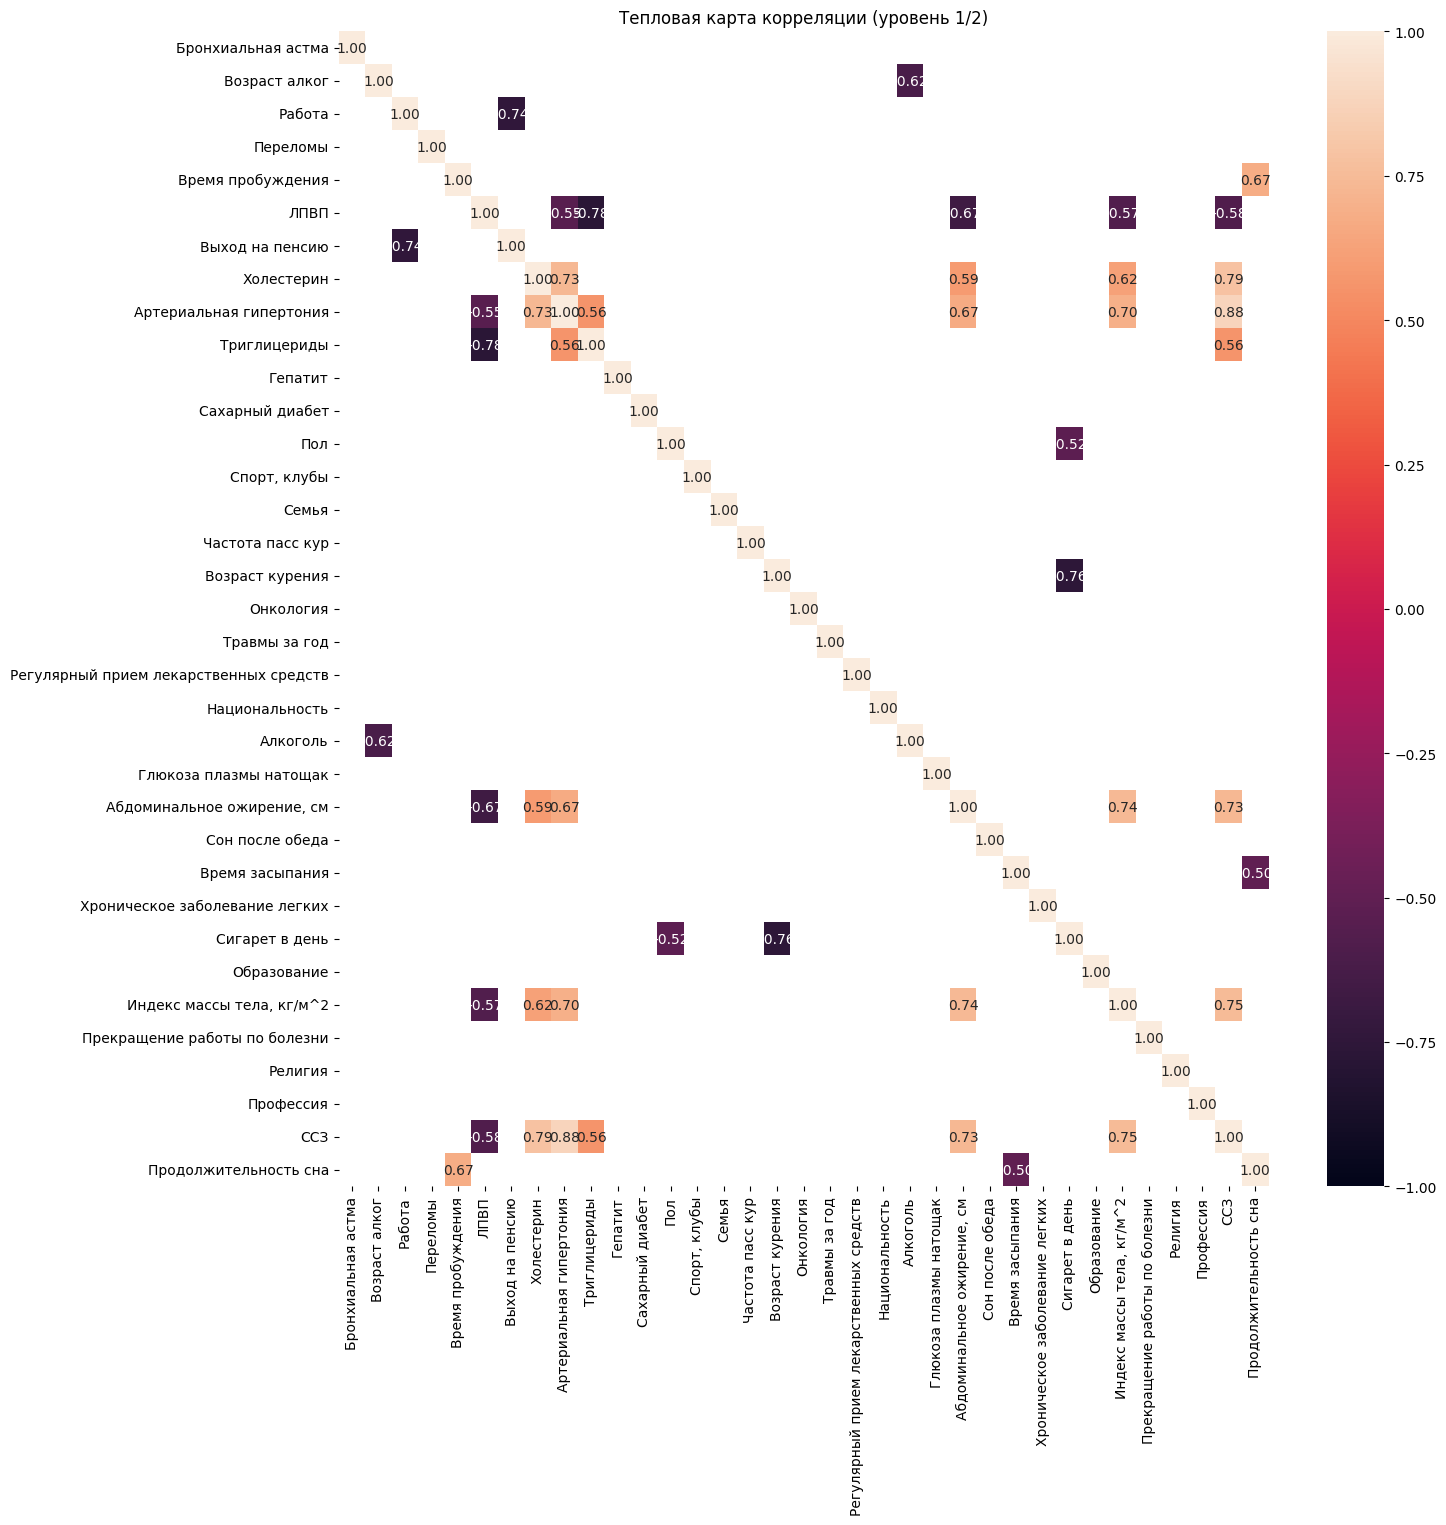

In [11]:
#изобразим только те значения, которые имеют значительную корреляцию
df_corr_table = table_data.corr()
mask_con_corr = df_corr_table[(df_corr_table >= 0.50) | (df_corr_table <= -0.50)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
fig = sns.heatmap(mask_con_corr, vmin=-1, vmax=1, annot=True, fmt='0.2f')
fig.set_title("Тепловая карта корреляции (уровень 1/2)")

# Методы PCA - princopal component analysis

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
table_data_pca = table_data
table_data_pca = table_data_pca.drop('ССЗ', axis = 1)
table_data_pca.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'Продолжительность сна'],
      dtype='object')

In [14]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)

pca = PCA(n_components = 2).fit(scaled_data) #количество компонет

#pca = PCA(n_components = 0.7).fit(scaled_data) #значение дисперсии, которое определит необходимое количество компонент

x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(949, 35) (949, 2)


In [15]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))
#To see how much variance is preserved for each dataset.

[0.13934273 0.08767728]
0.22702001077293382


In [16]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 22.70% explained variance
3 components at 28.48% explained variance
4 components at 33.88% explained variance
5 components at 38.40% explained variance
6 components at 42.47% explained variance
7 components at 46.24% explained variance
8 components at 49.88% explained variance
9 components at 53.40% explained variance
10 components at 56.78% explained variance
11 components at 59.94% explained variance
12 components at 63.06% explained variance
13 components at 66.07% explained variance
14 components at 69.04% explained variance
15 components at 71.80% explained variance
16 components at 74.53% explained variance
17 components at 77.08% explained variance
18 components at 79.60% explained variance
19 components at 81.97% explained variance
20 components at 84.26% explained variance
21 components at 86.52% explained variance


Text(0, 0.5, 'Second Principal Component')

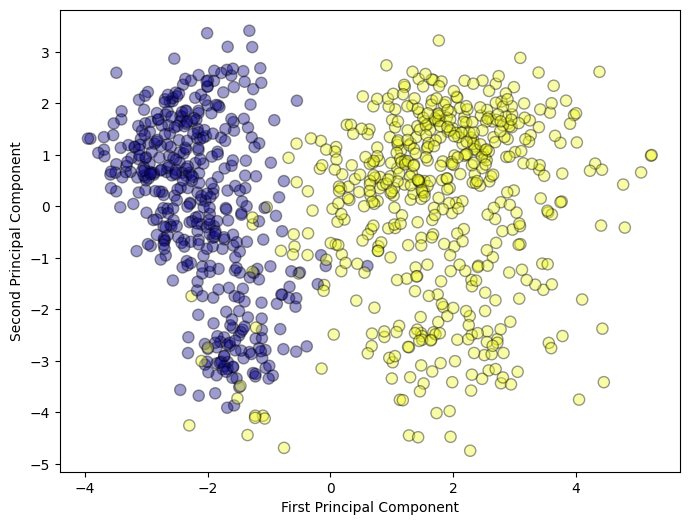

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['ССЗ'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# ICA independed component analysis

Text(0, 0.5, 'Second Independed Component')

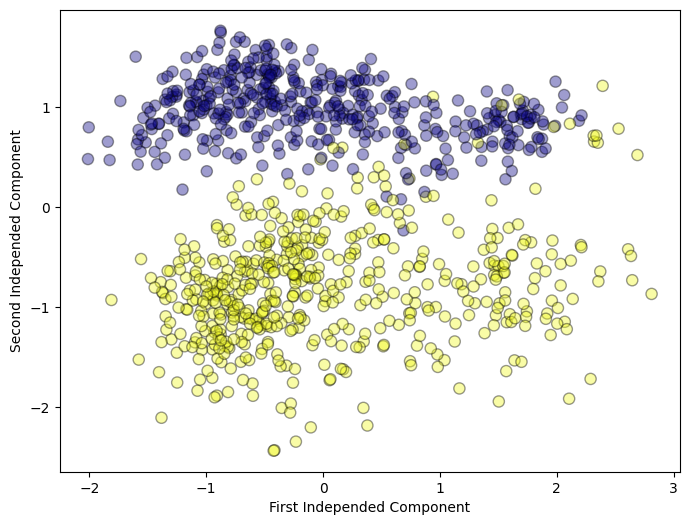

In [18]:
from sklearn.decomposition import FastICA

ICA = FastICA(n_components=2)
scaled_data_ica = ICA.fit_transform(scaled_data)


plt.figure(figsize=(8,6))
plt.scatter(scaled_data_ica[:,0],
            scaled_data_ica[:,1],
            c=table_data['ССЗ'],
            cmap='plasma',
            alpha=0.4,
            edgecolors='black',
            s=65
            );
plt.xlabel('First Independed Component')
plt.ylabel('Second Independed Component')

# Кластеризация

<Axes: xlabel='PC1', ylabel='PC2'>

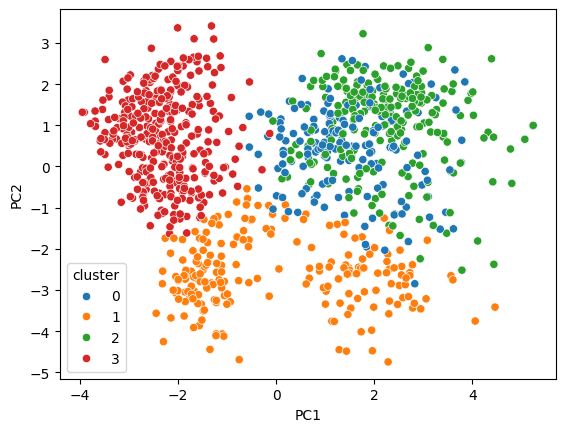

In [19]:
from sklearn.cluster import KMeans

pca_data = pd.DataFrame(x_pca[:,0:2],columns=['PC1','PC2'])


kmeans = KMeans(n_clusters=4).fit(scaled_data)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [20]:
scaled_data.shape[1]

34

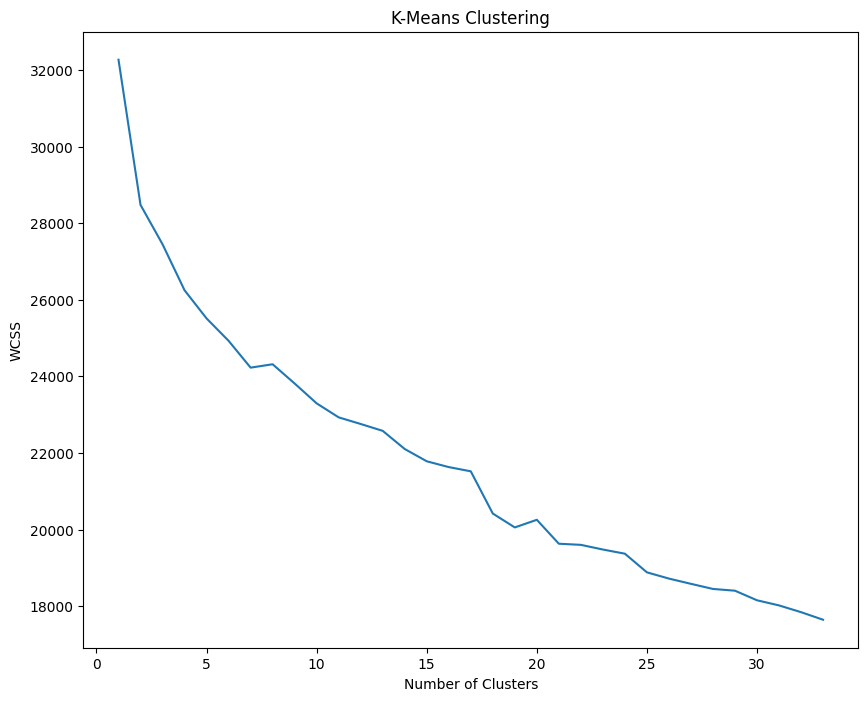

In [21]:
wcss=[]
#WCSS (Within-Cluster Sum of Squares) is a metric used to evaluate the compactness of clusters.
num_cluster = scaled_data.shape[1]
for i in range(1,num_cluster):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=37)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,num_cluster), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4).fit(scaled_data)

df_segm_kmeans=table_data_pca.copy()
df_segm_kmeans['Segment k-Means']=kmeans.labels_
df_segm_analysis=df_segm_kmeans.groupby(['Segment k-Means']).mean()
df_segm_analysis


,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,Продолжительность сна
Segment k-Means,,,,,,,,,,,,,,,,,,,,,
0,0.000000,69.189189,0.495495,0.243243,6.414414,1.387477,0.306306,4.627027,0.072072,1.038198,...,0.171171,11.261261,0.117117,3.297297,4.027027,24.130631,0.099099,671.161374,122.551782,-3.846847
1,0.013514,20.324324,0.698198,0.490991,6.635135,0.832568,0.166667,5.694144,0.427928,1.899459,...,0.261261,11.184685,0.117117,18.279279,3.873874,28.231532,0.040541,619.333556,103.009187,-3.549550
2,0.077333,36.344000,0.333333,0.378667,6.925333,0.907227,0.544000,7.224267,0.938667,3.064267,...,0.258667,11.117333,0.069333,1.597333,4.104000,32.351733,0.061333,718.954045,127.618292,-3.192000
3,0.037344,19.680498,0.672199,0.236515,7.012448,1.396141,0.178423,4.491701,0.024896,1.050456,...,0.165975,11.078838,0.029046,2.336100,4.431535,23.490041,0.012448,690.172410,144.613951,-3.066390


In [23]:
df_segm_kmeans

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,Продолжительность сна,Segment k-Means
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,-3,1
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,-7,2
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,-3,3
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,-3,1
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,-4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,18.0,1,1,6,0.90,0,4.6,0,0.75,...,10,0,20.0,4,27.1,0,799.091843,72.006723,-3,1
945,0,26.0,1,0,7,1.24,0,4.3,0,0.57,...,9,0,10.0,3,26.0,0,799.095093,136.059485,-1,0
946,0,20.0,0,0,8,1.01,1,5.9,1,3.54,...,10,0,10.0,3,27.8,0,799.057712,89.073887,-1,2
947,0,21.0,1,0,8,1.74,0,4.6,0,0.63,...,11,0,0.0,5,23.1,0,85.035712,35.003244,-2,3


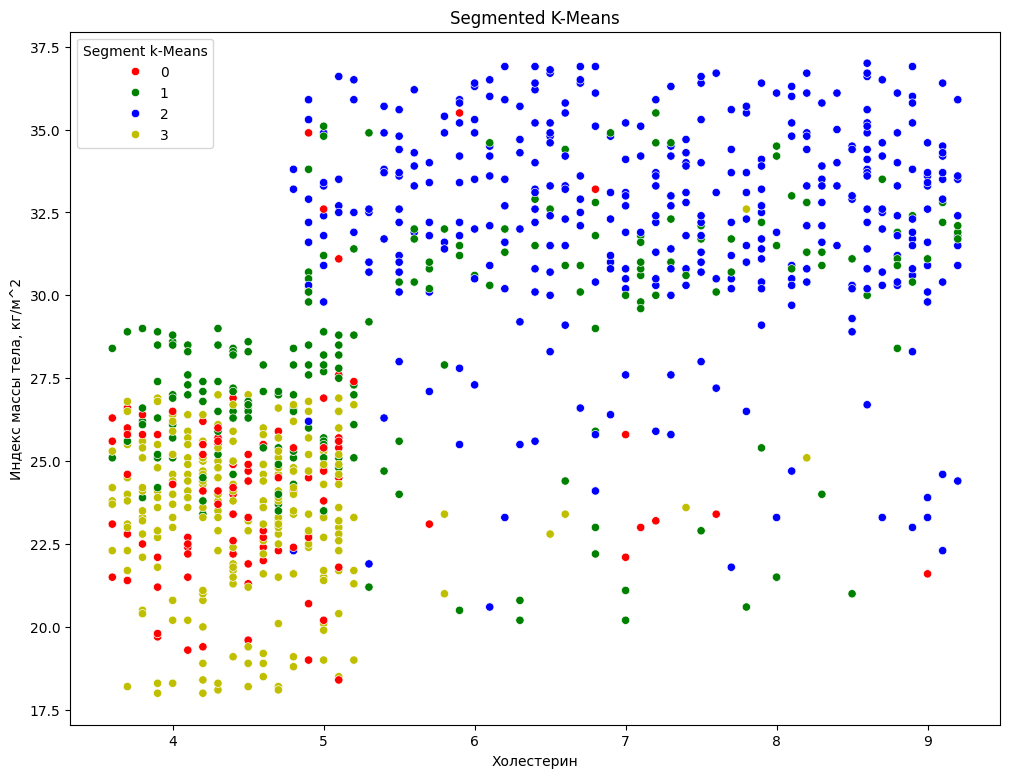

In [24]:
df_segm_analysis['N-obs']=df_segm_kmeans[['ЛПВП','Segment k-Means']].groupby(['Segment k-Means']).count()
df_segm_analysis['Prop-obs']=df_segm_analysis['N-obs']/df_segm_analysis['N-obs'].sum()

x_axis=df_segm_kmeans['Холестерин']
y_axis=df_segm_kmeans['Индекс массы тела, кг/м^2']
plt.figure(figsize=(12,9))
colors = ['r', 'g', 'b', 'y']
sns.scatterplot(x=x_axis,y=y_axis, hue=df_segm_kmeans['Segment k-Means'], palette=colors)
plt.title("Segmented K-Means")
plt.show()

In [25]:
table_data_pca.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'Продолжительность сна'],
      dtype='object')

In [26]:
pca.components_

array([[ 5.21257092e-02,  3.82227723e-02, -1.61947803e-01,
         8.36371256e-02,  1.75673457e-03, -3.49301984e-01,
         1.72573308e-01,  3.59727880e-01,  3.92189137e-01,
         3.15184236e-01, -1.63277040e-02,  1.53291713e-01,
        -2.03552408e-02, -4.39190575e-03, -1.87489977e-02,
        -5.70380252e-03,  2.78315278e-02,  4.87846503e-02,
         2.05995893e-02,  2.41182490e-01, -3.65616010e-04,
        -5.80853882e-02,  2.10180141e-01,  3.66774446e-01,
         6.24665931e-02, -1.42664637e-02,  3.09002444e-02,
        -2.08925978e-03, -7.87506925e-02,  3.75295289e-01,
         5.74211049e-02,  2.87497480e-02, -5.87007781e-02,
         1.26224113e-02],
       [ 4.78184494e-02,  2.37511962e-01, -1.85833008e-01,
        -9.99307334e-02,  6.43885458e-02,  2.47280137e-01,
         1.96208064e-01,  4.65859868e-02,  4.36008583e-02,
         7.01446462e-03, -2.71717674e-02,  4.35325744e-02,
         4.57157720e-01,  5.96982170e-02, -1.53814813e-01,
         4.14830951e-02,  4.35

/tmp/ipython-input-689558037.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
/tmp/ipython-input-689558037.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')


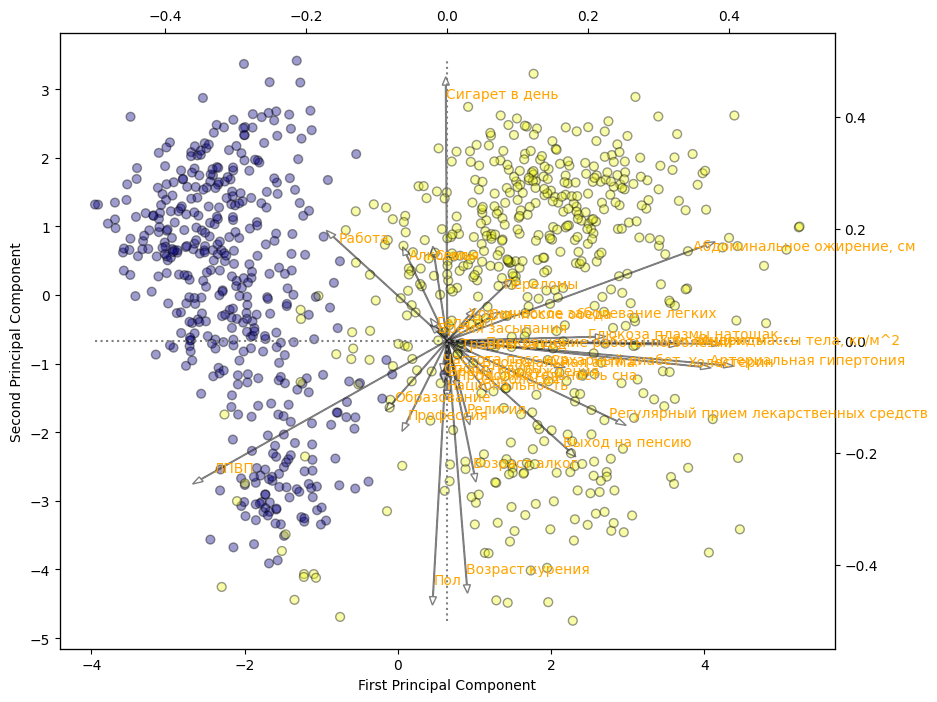

In [27]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['ССЗ'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

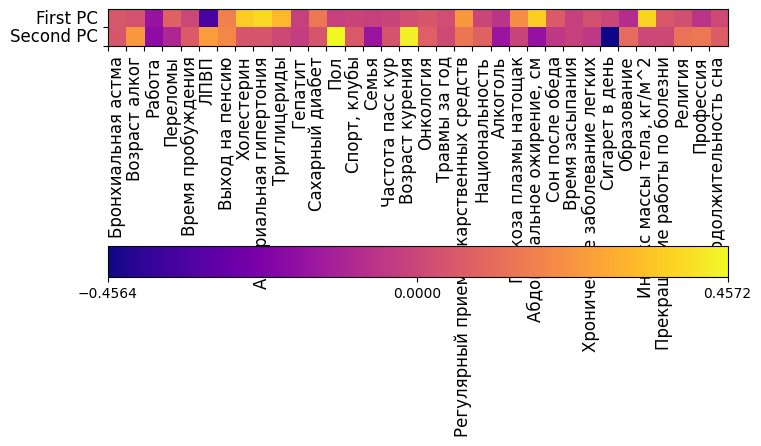

In [28]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

# MDS t-SNE

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

Text(0, 0.5, 'Second Principal Component')

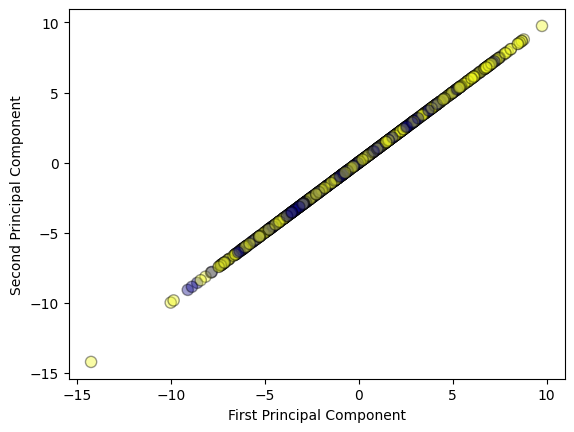

In [31]:
mds = MDS(n_components = 2)
scaled_data_mds = mds.fit_transform(scaled_data)

plt.scatter(scaled_data_mds[:,1], scaled_data_mds[:,1], c=table_data['ССЗ'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

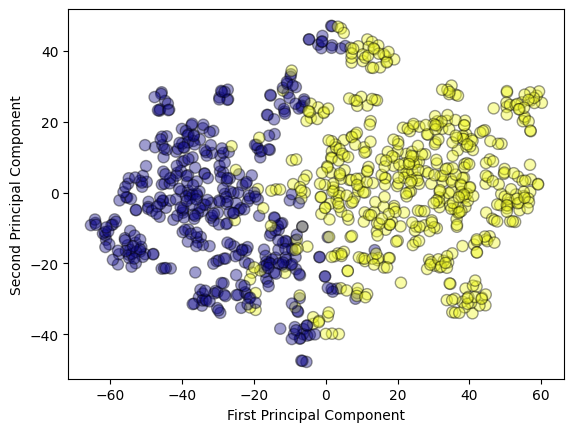

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0, perplexity=15)
scaled_data_mds_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_mds_tsne[:,0], scaled_data_mds_tsne[:,1], c=table_data['ССЗ'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [36]:
#scaled_data, data_table['Healthy_status'] = make_blobs(random_state = 10)
#n_clusters must be None if distance_threshold is not None
cls = AgglomerativeClustering(n_clusters = 3,linkage='ward', distance_threshold=None)
cls_assignment = cls.fit_predict(scaled_data)

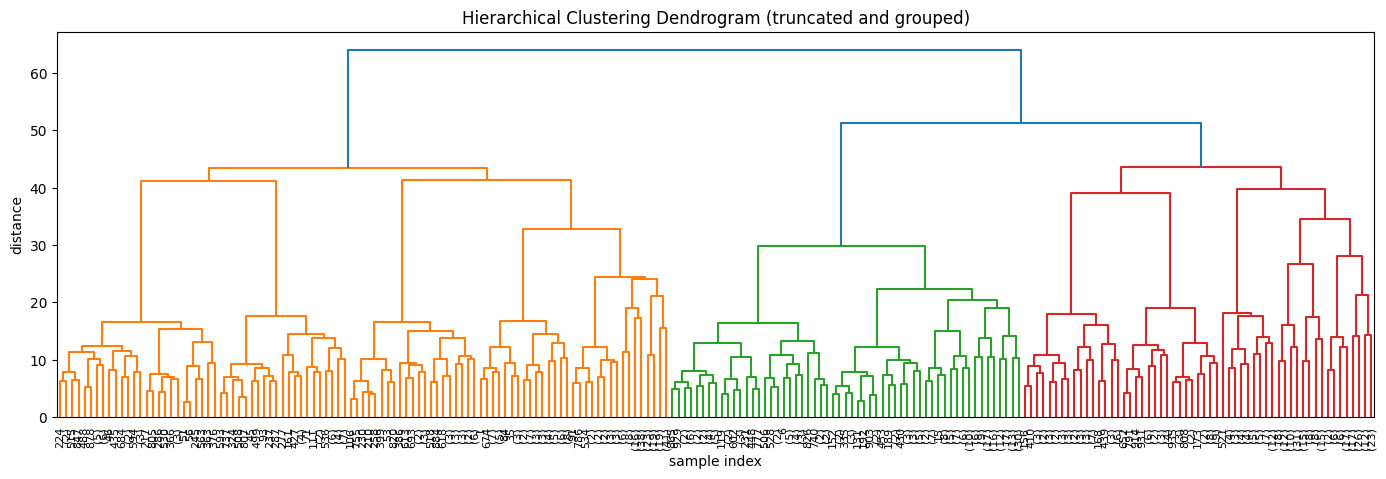

In [49]:
Z = ward(scaled_data)
plt.figure(figsize=(17,5));
R = dendrogram(Z, truncate_mode='level', p=7, orientation='top', leaf_font_size=8)  #p=7 кол-во колен на графике
plt.title('Hierarchical Clustering Dendrogram (truncated and grouped)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

# Affinity propagation

In [50]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_rand_score

In [51]:
def plot_connected_points(X, labels, centers, cmap):
    for i in range(len(X)):
        color = cmap(labels[i] / len(centers))
        plt.scatter([X[i, 5], centers[labels[i], 5]], [X[i, 29], centers[labels[i], 29]], c=color, alpha=0.8)

In [52]:
sk_ap = AffinityPropagation(preference = -200)
sk_ap_pred_res = sk_ap.fit_predict(scaled_data)
sk_ap_ari = adjusted_rand_score(table_data['ССЗ'], sk_ap_pred_res)
print(f'Adjusted Rand Score for sk AffinityPropagation: {sk_ap_ari}', '', sep='\n')
print('Number of clusters = ', np.max(sk_ap_pred_res))
#print('prediction', sk_ap_pred_res, sep='\n')

Adjusted Rand Score for sk AffinityPropagation: 0.07555542429927274

Number of clusters =  22


In [53]:
sk_ap.cluster_centers_.shape

(23, 34)

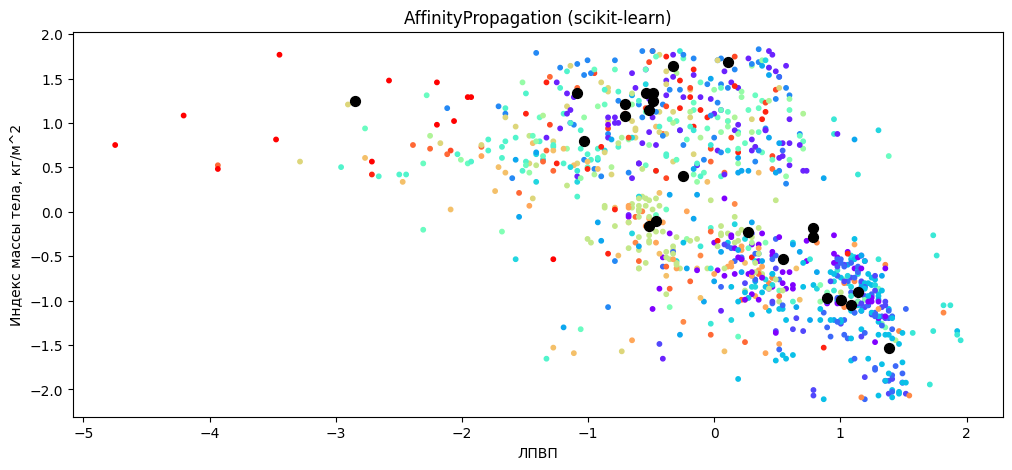

In [54]:
plt.figure(figsize=(12, 5))

plt.scatter(scaled_data[:, 5], scaled_data[:, 29], c=sk_ap_pred_res, cmap='rainbow', s=10)
plt.scatter(sk_ap.cluster_centers_[:, 5], sk_ap.cluster_centers_[:, 29], c='black', s=50)
plt.title('AffinityPropagation (scikit-learn)')
plt.xlabel(table_data.columns[5])
plt.ylabel(table_data.columns[29])

plt.show()

# Agglomerative Clustering

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [56]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    #plt.figure(figsize=(17,5));
    dendrogram(linkage_matrix, **kwargs)
    plt.rcParams["figure.figsize"] = (17,5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()



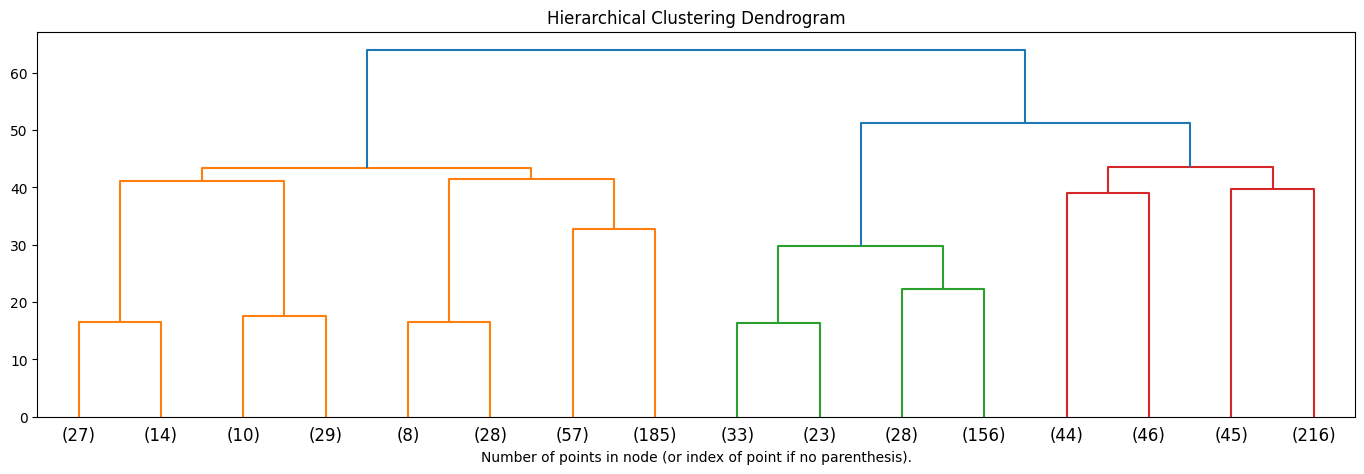

In [57]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(scaled_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
#